# Regressão

A documentação necessário das ferramentas usadas podem ser vistitadas em:

- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [Train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)


## Importar conjunto de dados

In [74]:
import pandas as pd
dataframe = pd.read_csv('datasets/weather.csv')

print(dataframe.shape)
print(dataframe.describe())


(366, 22)
          MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  366.000000  366.000000  366.000000   366.000000  363.000000   
mean     7.265574   20.550273    1.428415     4.521858    7.909366   
std      6.025800    6.690516    4.225800     2.669383    3.481517   
min     -5.300000    7.600000    0.000000     0.200000    0.000000   
25%      2.300000   15.025000    0.000000     2.200000    5.950000   
50%      7.450000   19.650000    0.000000     4.200000    8.600000   
75%     12.500000   25.500000    0.200000     6.400000   10.500000   
max     20.900000   35.800000   39.800000    13.800000   13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     364.000000    359.000000    366.000000   366.000000   366.000000   
mean       39.840659      9.651811     17.986339    72.035519    44.519126   
std        13.059807      7.951929      8.856997    13.137058    16.850947   
min        13.000000      0.000000      0.00000

## Relação entre dois atributos

(366, 22)
          MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  366.000000  366.000000  366.000000   366.000000  363.000000   
mean     7.265574   20.550273    1.428415     4.521858    7.909366   
std      6.025800    6.690516    4.225800     2.669383    3.481517   
min     -5.300000    7.600000    0.000000     0.200000    0.000000   
25%      2.300000   15.025000    0.000000     2.200000    5.950000   
50%      7.450000   19.650000    0.000000     4.200000    8.600000   
75%     12.500000   25.500000    0.200000     6.400000   10.500000   
max     20.900000   35.800000   39.800000    13.800000   13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     364.000000    359.000000    366.000000   366.000000   366.000000   
mean       39.840659      9.651811     17.986339    72.035519    44.519126   
std        13.059807      7.951929      8.856997    13.137058    16.850947   
min        13.000000      0.000000      0.00000

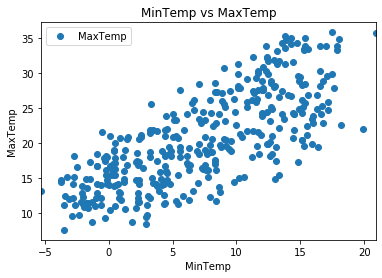

In [36]:
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

dataframe.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title("MinTemp vs MaxTemp")
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

## Correlação entre todos atributos

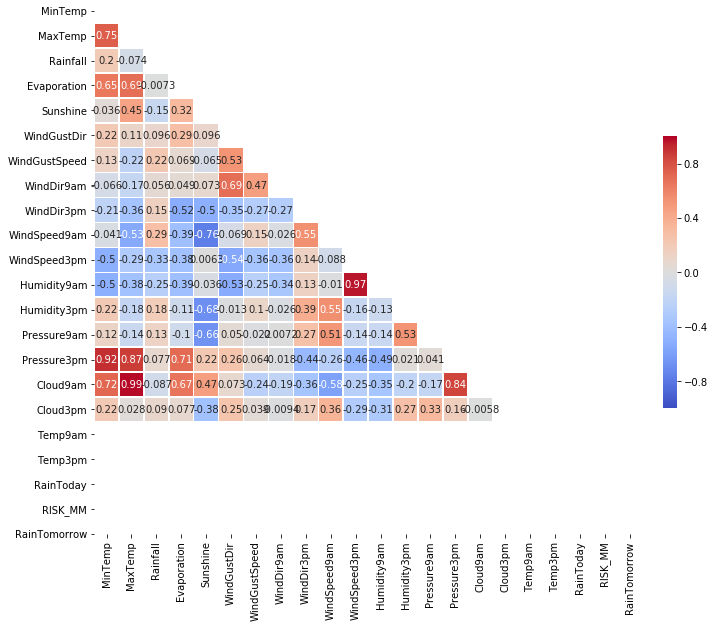

In [37]:
import numpy as np
plt.figure(figsize=(12,10))
cor = dataframe.corr()

mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(cor, annot=True, mask=mask, cmap=plt.cm.coolwarm, xticklabels=dataframe.columns,
            yticklabels=dataframe.columns, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## Distribuição de dados

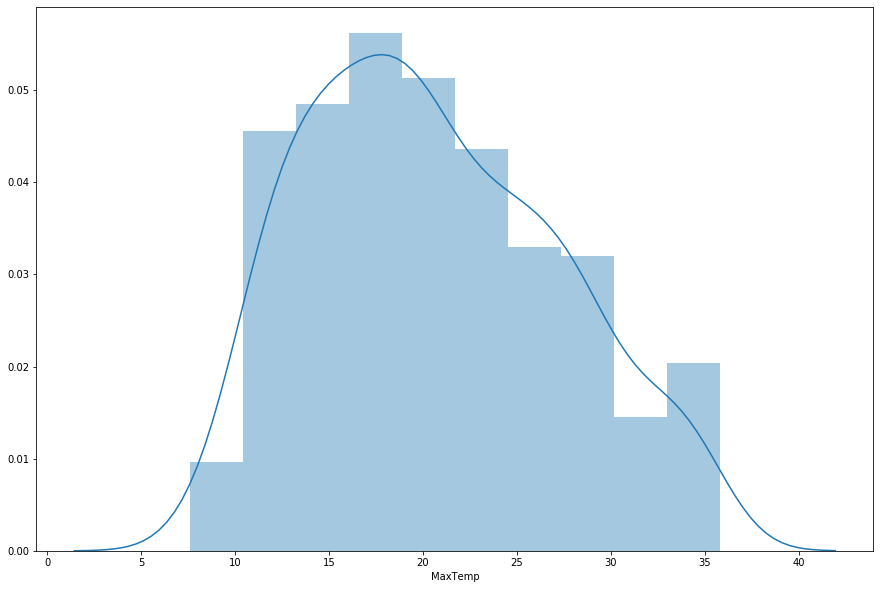

In [38]:
plt.figure(figsize=(15, 10))
plt.tight_layout()
sns.distplot(dataframe['MaxTemp'])
plt.show()

## Data splicing

In [69]:
X = dataframe['MinTemp'].values.reshape(-1,1)
y = dataframe['MaxTemp'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Treinando o algoritmo

In [70]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Informações do Modelo

In [71]:
print('Intercept:', clf.intercept_)
print('Coefficient:', clf.coef_)

Intercept: [14.546605]
Coefficient: [[0.83250593]]


## Predição

    Certo    Predito
0    35.0  27.367196
1    12.4  19.375139
2    22.8  21.539655
3    17.3  13.297846
4    15.4  14.962858
..    ...        ...
69   15.1  11.799335
70   17.9  14.213603
71   16.7  18.209631
72   18.2  19.624891
73   23.4  20.457397

[74 rows x 2 columns]


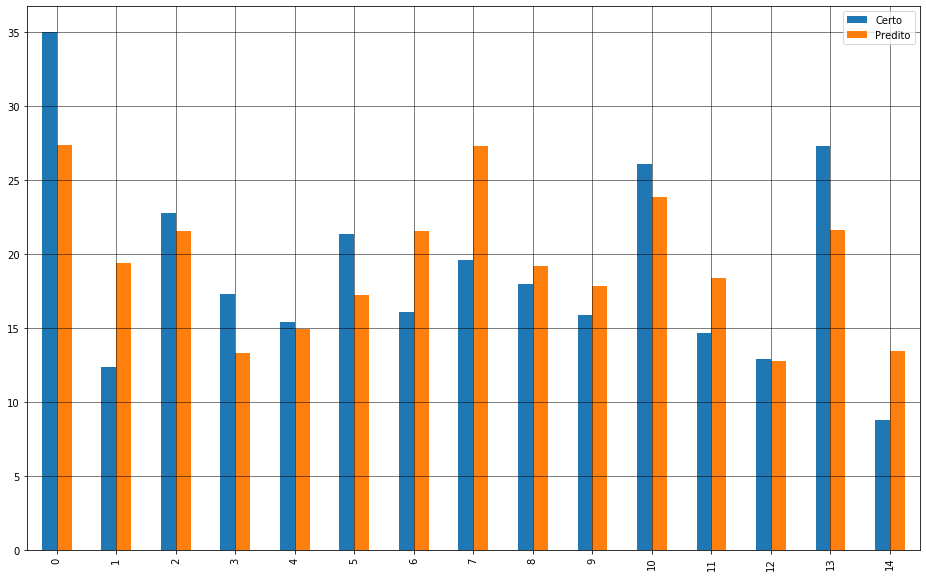

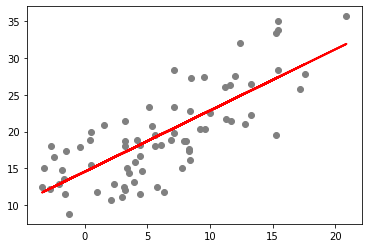

In [72]:
y_pred = clf.predict(X_test)

df = pd.DataFrame({"Certo": y_test.flatten(), "Predito": y_pred.flatten()})
print(df)

df = df.head(15)
df.plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.show()

plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

## Avaliação do Modelo

In [73]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
    
print("Erro absoluto médio:", mean_absolute_error(y_test, y_pred))
print("Erro quadrático médio:", mean_squared_error(y_test, y_pred))
print("Raiz do erro quadrático médio:", np.sqrt(mean_squared_error(y_test, y_pred)))

Erro absoluto médio: 3.348027322657814
Erro quadrático médio: 15.891118530443595
Raiz do erro quadrático médio: 3.9863665825465167
